In [17]:
import numpy as np
import matplotlib.pyplot as plt
import os
import h5py
import pandas as pd

# Reading data

In [3]:
def read_fnames(fname):
    with open(fname) as f:
        fnames = [l.strip() for l in f.readlines()]
        
    return fnames

cell_id = lambda f: int(os.path.basename(f).split(".")[0])
cell_ids = list(map(cell_id, read_fnames("aux_data/180928_cells.csv")))

In [6]:
INF_DIR = "/usr/people/nturner/seungmount/research/nick_and_sven/models_nick/p100_dend_outer/inference"

In [16]:
# Features
def read_features(fname):
    assert os.path.isfile(fname)
    with h5py.File(fname) as f:
        return f["features"].value

In [11]:
fs_list = list(read_features(f"{INF_DIR}/{i}_pca_features.h5") for i in cell_ids)

In [15]:
fs = np.vstack(fs_list)

In [26]:
# Qualitative observations
notes_df = pd.read_csv("aux_data/180930_dendrite_notes.csv", index_col=0)
notes_df.head()

,spiny (1-5),major axis x (basal),major axis y (apical),major axis z (basal),length (1-5),soma,branched
546254140358,3,1,0,1,3,0,0
1067765194641,4,0,0,1,1,0,0
2309937727136,4,1,0,1,1,0,0
442151416423,2,0,1,0,1,0,0
1993494634805,3,1,0,1,1,0,0


# Plotting

In [22]:
cm = plt.get_cmap('tab10')
colors = [cm(.05 + .1 * i) for i in range(10)]

In [23]:
def plot_variable(xy, labels=None, x_label="PC 1", y_label="PC 2"):
    
    if labels is None:
        labels = np.ones((xy.shape[0],), dtype=np.uint8)
    
    u_labels = np.unique(labels)
    
    plt.figure(figsize=(10,10))
    
    for i_label, u_label in enumerate(u_labels):
        l = labels == u_label
        plt.scatter(xy[l,0], xy[l,1], alpha=0.7, c=colors[i_label])
    
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    
    plt.show()

In [27]:
obs_inds = [cell_ids.index(i) for i in notes_df.index]

In [30]:
def make_labels(col, inds, total_n=300):
    label_col = np.zeros((total_n,), dtype=np.uint8)
    
    label_col[inds] = col + 1
    return label_col

In [31]:
make_labels(notes_df["spiny (1-5)"], obs_inds, total_n=50)

array([4, 5, 5, 3, 4, 2, 5, 6, 6, 2, 5, 5, 4, 4, 4, 5, 4, 5, 4, 4, 4, 5,
       4, 5, 5, 4, 5, 3, 2, 4, 5, 5, 5, 5, 5, 4, 4, 6, 5, 5, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=uint8)

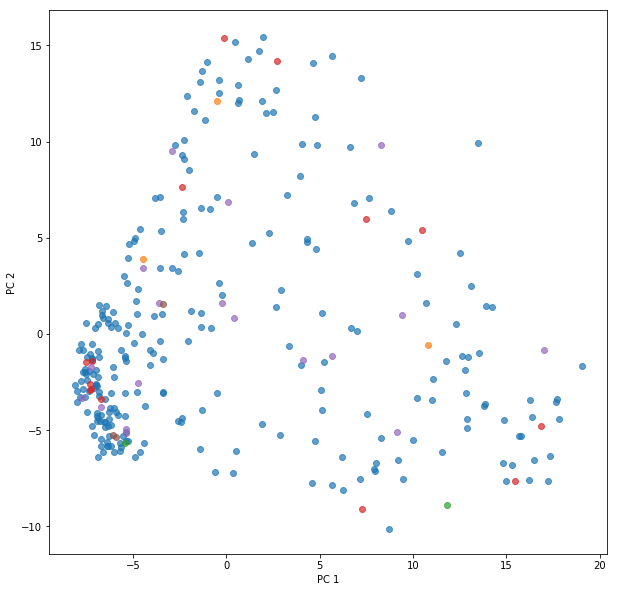

In [38]:
lbls = make_labels(notes_df["spiny (1-5)"], obs_inds)
plot_variable(fs[:,:2], lbls)

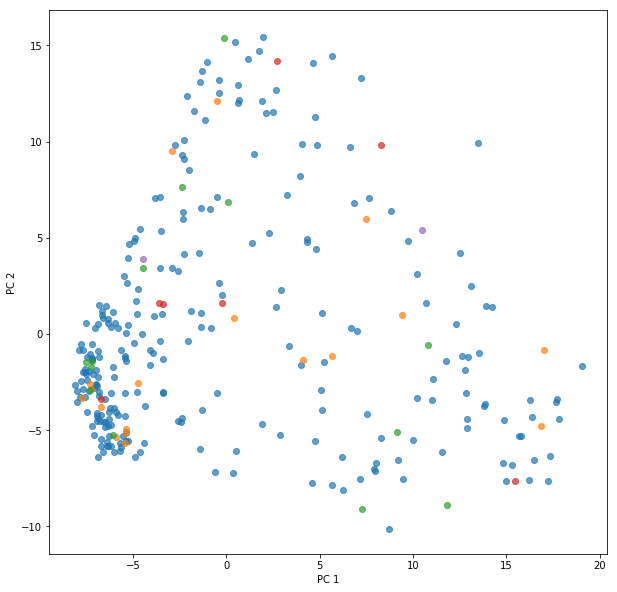

In [34]:
lbls = make_labels(notes_df["length (1-5)"], obs_inds)
plot_variable(fs[:,:2], lbls)

In [39]:
notes_df.basal = notes_df["major axis x (basal)"] | notes_df["major axis z (basal)"]

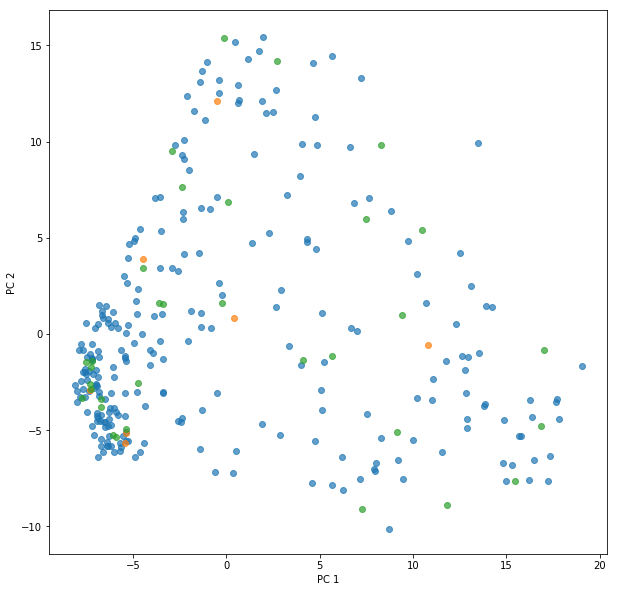

In [42]:
lbls = make_labels(notes_df.basal, obs_inds)
plot_variable(fs[:,:2], lbls)

# Try going the other way - pick meshes with extreme values and visualize

In [53]:
pc1_argsort = np.argsort(fs[:,0])
pc2_argsort = np.argsort(fs[:,1])
pc3_argsort = np.argsort(fs[:,2])
pc4_argsort = np.argsort(fs[:,3])

In [44]:
ids = np.array(cell_ids)

# PC1

In [49]:
with viewer.txn() as state:
    state.layers["seg"].layer.segments = list(ids[pc1_argsort[:20]])

No clear feature here...

![low_pc1](aux_data/180930_low_pc1.png)

In [49]:
with viewer.txn() as state:
    state.layers["seg"].layer.segments = list(ids[pc1_argsort[-20:]])

A different region of space, and usually very spiny, but not always

![high_pc1](aux_data/180930_high_pc1.png)

# PC2

In [49]:
with viewer.txn() as state:
    state.layers["seg"].layer.segments = list(ids[pc2_argsort[:20]])

Confined to another corner and pretty spiny. A couple apicals

![low_pc2](aux_data/180930_low_pc2.png)

In [49]:
with viewer.txn() as state:
    state.layers["seg"].layer.segments = list(ids[pc2_argsort[-20:]])

Opposite corner and medium spiny?

![high_pc2](aux_data/180930_high_pc2.png)

# PC3

In [49]:
with viewer.txn() as state:
    state.layers["seg"].layer.segments = list(ids[pc3_argsort[:20]])

Another corner... seems like the only real pattern so far

![low_pc3](aux_data/180930_low_pc3.png)

In [49]:
with viewer.txn() as state:
    state.layers["seg"].layer.segments = list(ids[pc3_argsort[-20:]])

Opposite corner again...

![high_pc3](aux_data/180930_high_pc3.png)